In [15]:
import numpy as np

In [2]:
data_dir = "."
model_label = "finnish_model_100_size"
from main import explain_using_raw_probs
indexed_Cs, zero_centered_Ps, id_to_morpho_tag, explanations, explanations_nparray_dict = \
            explain_using_raw_probs(model_label, data_dir)

In [3]:
indexed_Cs.keys()

dict_keys(['ORG', 'TIT', 'PER', 'TIM', 'LOC', 'DATE', 'PRO', 'MISC', 'EVENT', 'OUTSIDE'])

In [4]:

M = indexed_Cs['LOC'][0][0].shape[0]

In [5]:
indexed_Cs['LOC'].shape

(2040,)

In [6]:
indexed_Cs['LOC'][0].shape

(9, 89)

In [7]:
n_samples_0 = indexed_Cs['LOC'][0].shape[0]

In [8]:
indexed_Cs['LOC'][0][:3]

array([[ 1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -1,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0

In [9]:
zero_centered_Ps['LOC'][0]

[0.0,
 0.003384900000000024,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00011309999999997711,
 0.0,
 0.0]

In [10]:
import seaborn as sns

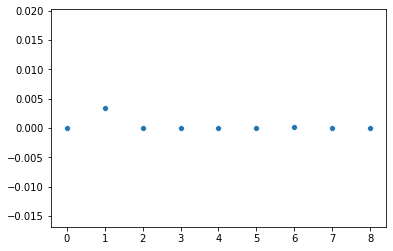

In [11]:
sns.scatterplot(range(n_samples_0), zero_centered_Ps['LOC'][0])

In [12]:
explanations_nparray_dict['LOC'].shape

(2040, 89)

[(0, -0.0011207600000000095), (1, 0.00023320000000000006), (2, 0.00023320000000000006), (3, 0.00023320000000000006), (5, 0.00023320000000000006), (7, 0.00018796000000000923), (10, 0.00023320000000000006), (21, 0.00023320000000000006)]


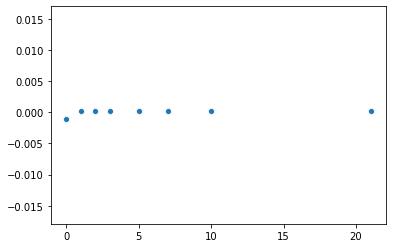

In [13]:
morph_tags_nonzero = [m for m in range(M) if explanations_nparray_dict['LOC'][0][m] != 0]
importance_values_nonzero = [explanations_nparray_dict['LOC'][0][m] for m in morph_tags_nonzero]
print(list(zip(morph_tags_nonzero, importance_values_nonzero)))
sns.scatterplot(morph_tags_nonzero, importance_values_nonzero)

In [16]:
norm_explanations_nparray_dict = dict()
for entity_type in explanations_nparray_dict.keys():
    norm_explanations_nparray_dict[entity_type] = (explanations_nparray_dict[entity_type]-np.mean(explanations_nparray_dict[entity_type], axis=1, keepdims=True))/np.std(explanations_nparray_dict[entity_type], axis=1, keepdims=True)

In [17]:
norm_explanations_nparray_dict['LOC'].shape

(2040, 89)

In [18]:
id_to_morpho_tag[1]

'Case=Nom'

In [19]:
concatenated_norm_explanations = None
region_entity_types = []
for entity_type in norm_explanations_nparray_dict.keys():
    print(entity_type)
    region_entity_types += [entity_type] * norm_explanations_nparray_dict[entity_type].shape[0]
    if concatenated_norm_explanations is None:
        concatenated_norm_explanations = norm_explanations_nparray_dict[entity_type]
    else:
        concatenated_norm_explanations = np.concatenate((concatenated_norm_explanations,
                                                         norm_explanations_nparray_dict[entity_type]),
                                                        axis=0)
                                                         
                                                         
                                                         
                                                         

ORG
TIT
PER
TIM
LOC
DATE
PRO
MISC
EVENT
OUTSIDE


In [20]:
concatenated_norm_explanations.shape

(25578, 89)

In [21]:
len(region_entity_types)

25578

In [22]:
region_entity_types[:3]

['ORG', 'ORG', 'ORG']

In [23]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
import sklearn
le = sklearn.preprocessing.LabelEncoder()
le.fit(region_entity_types)

LabelEncoder()

In [67]:
le.transform(region_entity_types)

array([4, 4, 4, ..., 5, 5, 5])

In [68]:
le.classes_

array(['DATE', 'EVENT', 'LOC', 'MISC', 'ORG', 'OUTSIDE', 'PER', 'PRO',
       'TIM', 'TIT'], dtype='<U7')

In [81]:
[int(x) for x in [True, False]]

[1, 0]

In [83]:
from sklearn.linear_model import LogisticRegression

clf = {entity_type: dict() for entity_type in norm_explanations_nparray_dict.keys()}
scores = {entity_type: dict() for entity_type in norm_explanations_nparray_dict.keys()}

for entity_tag in norm_explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():
        
        clf[entity_type][morpho_tag_id] = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='multinomial', max_iter=1000, verbose=0)
        single_feature_X = concatenated_norm_explanations[:, morpho_tag_id].reshape([-1,1])
        binarized_y = [int(x == entity_tag) for x in region_entity_types]
        y = binarized_y
        clf[entity_type][morpho_tag_id].fit(single_feature_X, y)
        scores[entity_type][morpho_tag_id] = clf[entity_type][morpho_tag_id].score(single_feature_X, y)
        print(entity_tag, morpho_tag_id, morpho_tag, scores[entity_type][morpho_tag_id])

ORG 0 Number=Sing 0.6441864101962624
ORG 1 Case=Nom 0.6441864101962624
ORG 2 Voice=Act 0.6860583313785285
ORG 3 VerbForm=Fin 0.6849636406286652
ORG 4 *BLANK* 0.7559230588787239
ORG 5 Mood=Ind 0.6862147157713661
ORG 6 Number=Plur 0.6401986081789037
ORG 7 Case=Gen 0.6412542028305576
ORG 8 Degree=Pos 0.6330440222065837
ORG 9 Person=3 0.645124716553288
ORG 10 Tense=Pres 0.6754632887637814
ORG 11 Case=Par 0.6441864101962624
ORG 12 Tense=Past 0.6591211197122527
ORG 13 Style=Coll 0.6411369145359294
ORG 14 VerbForm=Part 0.6441864101962624
ORG 15 Case=Ine 0.6307764485104387
ORG 16 Case=Ill 0.6441864101962624
ORG 17 PartForm=Past 0.6437172570177496
ORG 18 Case=Ela 0.6405895691609977
ORG 19 VerbForm=Inf 0.6688169520681836
ORG 20 Voice=Pass 0.6378137461881305
ORG 21 Person=1 0.6881695206818359
ORG 22 Case=Ade 0.6426616623660959
ORG 23 Person=0 0.6369536320275236
ORG 24 Connegative=Yes 0.6435999687231214
ORG 25 Polarity=Neg 0.6902416138869341
ORG 26 InfForm=1 0.6462194073031512
ORG 27 Person[psor]=

PER 41 Abbr=Yes 0.9128547970912503
PER 42 PronType=Prs 0.9128547970912503
PER 43 InfForm=3 0.9127375087966221
PER 44 Foreign=Yes 0.9128547970912503
PER 45 Clitic=Kin 0.9128547970912503
PER 46 Case=Ins 0.9127766048948315
PER 47 PartForm=Agt 0.9128547970912503
PER 48 Case=Abl 0.9128547970912503
PER 49 Person[psor]=1 0.9126202205019939
PER 50 InfForm=2 0.9128547970912503
PER 51 PronType=Rel 0.9124638361091563
PER 52 Number[psor]=Sing 0.9123074517163187
PER 53 AdpType=Prep 0.9128547970912503
PER 54 Derivation=Lainen 0.9128547970912503
PER 55 Degree=Sup 0.9128547970912503
PER 56 NumType=Ord 0.9128547970912503
PER 57 Clitic=Ko 0.9129329892876691
PER 58 Clitic=Kaan 0.9124638361091563
PER 59 Degree=Cmp 0.9122683556181093
PER 60 Derivation=Sti 0.9121901634216906
PER 61 Derivation=Inen 0.9128547970912503
PER 62 PronType=Int 0.9127766048948315
PER 63 Number[psor]=Plur 0.9126202205019939
PER 64 Clitic=Ka 0.9128547970912503
PER 65 Person[psor]=2 0.9121901634216906
PER 66 Clitic=Han 0.91273750879662

LOC 83 PartForm=Neg 0.9200484791617797
LOC 84 Derivation=U 0.9200484791617797
LOC 85 Clitic=Han,Pa 0.9200484791617797
LOC 86 Derivation=Llinen 0.9200484791617797
LOC 87 Derivation=Tar 0.9200484791617797
LOC 88 *UNKNOWN* 0.9202439596528267
DATE 0 Number=Sing 0.9626241301118148
DATE 1 Case=Nom 0.9626241301118148
DATE 2 Voice=Act 0.9626241301118148
DATE 3 VerbForm=Fin 0.9626241301118148
DATE 4 *BLANK* 0.9626241301118148
DATE 5 Mood=Ind 0.9626241301118148
DATE 6 Number=Plur 0.9626241301118148
DATE 7 Case=Gen 0.9626241301118148
DATE 8 Degree=Pos 0.9626241301118148
DATE 9 Person=3 0.9626241301118148
DATE 10 Tense=Pres 0.9626241301118148
DATE 11 Case=Par 0.9626241301118148
DATE 12 Tense=Past 0.9626241301118148
DATE 13 Style=Coll 0.9626241301118148
DATE 14 VerbForm=Part 0.9679802955665024
DATE 15 Case=Ine 0.9634842442724216
DATE 16 Case=Ill 0.9624286496207678
DATE 17 PartForm=Past 0.9714598483071389
DATE 18 Case=Ela 0.9626241301118148
DATE 19 VerbForm=Inf 0.9626241301118148
DATE 20 Voice=Pass 

MISC 37 Typo=Yes 0.964500742825866
MISC 38 Mood=Cnd 0.964305262334819
MISC 39 PronType=Ind 0.964500742825866
MISC 40 Mood=Imp 0.9644225506294472
MISC 41 Abbr=Yes 0.964500742825866
MISC 42 PronType=Prs 0.964500742825866
MISC 43 InfForm=3 0.9642661662366095
MISC 44 Foreign=Yes 0.964500742825866
MISC 45 Clitic=Kin 0.964500742825866
MISC 46 Case=Ins 0.964500742825866
MISC 47 PartForm=Agt 0.964500742825866
MISC 48 Case=Abl 0.964500742825866
MISC 49 Person[psor]=1 0.9643834545312377
MISC 50 InfForm=2 0.964500742825866
MISC 51 PronType=Rel 0.9643443584330283
MISC 52 Number[psor]=Sing 0.9643443584330283
MISC 53 AdpType=Prep 0.964500742825866
MISC 54 Derivation=Lainen 0.964500742825866
MISC 55 Degree=Sup 0.964500742825866
MISC 56 NumType=Ord 0.964500742825866
MISC 57 Clitic=Ko 0.963914301352725
MISC 58 Clitic=Kaan 0.964500742825866
MISC 59 Degree=Cmp 0.964500742825866
MISC 60 Derivation=Sti 0.9642270701384001
MISC 61 Derivation=Inen 0.9644225506294472
MISC 62 PronType=Int 0.9643834545312377
MIS

OUTSIDE 68 Mood=Pot 0.999804519508953
OUTSIDE 69 Case=Abe 0.999804519508953
OUTSIDE 70 Reflex=Yes 0.999804519508953
OUTSIDE 71 Case=Acc 0.999804519508953
OUTSIDE 72 Clitic=Pa 0.999804519508953
OUTSIDE 73 PronType=Rcp 0.999804519508953
OUTSIDE 74 Derivation=Ja 0.999804519508953
OUTSIDE 75 Derivation=Vs 0.999804519508953
OUTSIDE 76 Derivation=Ton 0.999804519508953
OUTSIDE 77 Clitic=Ko,S 0.999804519508953
OUTSIDE 78 Clitic=Pa,S 0.999804519508953
OUTSIDE 79 Case=Com 0.999804519508953
OUTSIDE 80 Derivation=Ttain 0.999804519508953
OUTSIDE 81 Clitic=Han,Ko 0.999804519508953
OUTSIDE 82 Style=Arch 0.999804519508953
OUTSIDE 83 PartForm=Neg 0.999804519508953
OUTSIDE 84 Derivation=U 0.999804519508953
OUTSIDE 85 Clitic=Han,Pa 0.999804519508953
OUTSIDE 86 Derivation=Llinen 0.999804519508953
OUTSIDE 87 Derivation=Tar 0.999804519508953
OUTSIDE 88 *UNKNOWN* 0.999804519508953


In [78]:
scores.items()

dict_items([(0, 0.3575338181249511), (1, 0.3497927906794902), (2, 0.4004613339588709), (3, 0.37798107748846665), (4, 0.45316287434514035), (5, 0.3768472906403941), (6, 0.3737196027836422), (7, 0.35577449370552816), (8, 0.3763781374618813), (9, 0.3556572054109), (10, 0.3716084134803347), (11, 0.361052466963797), (12, 0.36171710063335677), (13, 0.3557353976073188), (14, 0.3797404019078896), (15, 0.3829071858628509), (16, 0.3598404879193057), (17, 0.38013136288998356), (18, 0.36066150598170305), (19, 0.36015325670498083), (20, 0.3657439987489249), (21, 0.3647275001954805), (22, 0.35690828055360074), (23, 0.3623426382047072), (24, 0.3516694033935413), (25, 0.4006568144499179), (26, 0.3583939322855579), (27, 0.3574556259285323), (28, 0.36625224802564704), (29, 0.3555008210180624), (30, 0.35338963171475485), (31, 0.36015325670498083), (32, 0.4365470326061459), (33, 0.3669950738916256), (34, 0.3693799358823989), (35, 0.3673469387755102), (36, 0.40761591993119084), (37, 0.355266244428806), (38

In [72]:
pred_entity_types = clf.predict(concatenated_norm_explanations)

In [74]:
sum(pred_entity_types == le.transform(region_entity_types))

15748

In [26]:
concatenated_unnorm_explanations = None
region_entity_types = []
for entity_type in explanations_nparray_dict.keys():
    print(entity_type)
    region_entity_types += [entity_type] * explanations_nparray_dict[entity_type].shape[0]
    if concatenated_unnorm_explanations is None:
        concatenated_unnorm_explanations = explanations_nparray_dict[entity_type]
    else:
        concatenated_unnorm_explanations = np.concatenate((concatenated_unnorm_explanations,
                                                         explanations_nparray_dict[entity_type]),
                                                        axis=0)
                                                         
                                                         
                                                         
                                                         

ORG
TIT
PER
TIM
LOC
DATE
PRO
MISC
EVENT
OUTSIDE


In [98]:
from sklearn.linear_model import LogisticRegression

clf = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}
scores = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}

print(scores)

for entity_tag in explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():
        
        clf[entity_tag][morpho_tag_id] = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='multinomial', max_iter=1000, verbose=0)
        single_feature_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
        binarized_y = [int(x == entity_tag) for x in region_entity_types]
        y = binarized_y
        clf[entity_tag][morpho_tag_id].fit(single_feature_X, y)
        scores[entity_tag][morpho_tag_id] = clf[entity_tag][morpho_tag_id].score(single_feature_X, y)
        # print(scores)
        prior_prob_of_entity_tag_class = sum(binarized_y)/float(len(binarized_y))
        print(entity_tag, morpho_tag_id, morpho_tag, scores[entity_tag][morpho_tag_id], 
              prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class,
             max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class))

{'ORG': {}, 'TIT': {}, 'PER': {}, 'TIM': {}, 'LOC': {}, 'DATE': {}, 'PRO': {}, 'MISC': {}, 'EVENT': {}, 'OUTSIDE': {}}
ORG 0 Number=Sing 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 1 Case=Nom 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 2 Voice=Act 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 3 VerbForm=Fin 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 4 *BLANK* 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 5 Mood=Ind 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 6 Number=Plur 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 7 Case=Gen 0.6442255062944718 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 8 Degree=Pos 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 9 Person=3 0.6441864101962624 0.35581

ORG 87 Derivation=Tar 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
ORG 88 *UNKNOWN* 0.6441864101962624 0.35581358980373756 0.6441864101962624 0.6441864101962624
TIT 0 Number=Sing 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 1 Case=Nom 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 2 Voice=Act 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 3 VerbForm=Fin 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 4 *BLANK* 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 5 Mood=Ind 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 6 Number=Plur 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 7 Case=Gen 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 8 Degree=Pos 0.9753303620298694 0.02466963797013058 0.975

TIT 84 Derivation=U 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 85 Clitic=Han,Pa 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 86 Derivation=Llinen 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 87 Derivation=Tar 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
TIT 88 *UNKNOWN* 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
PER 0 Number=Sing 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 1 Case=Nom 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 2 Voice=Act 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 3 VerbForm=Fin 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 4 *BLANK* 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 5 Mood=Ind 0.9128547970912503 0.087145202908

PER 84 Derivation=U 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 85 Clitic=Han,Pa 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 86 Derivation=Llinen 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 87 Derivation=Tar 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
PER 88 *UNKNOWN* 0.9128547970912503 0.0871452029087497 0.9128547970912503 0.9128547970912503
TIM 0 Number=Sing 0.7988114786144342 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 1 Case=Nom 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 2 Voice=Act 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 3 VerbForm=Fin 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 4 *BLANK* 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 5 Mood=Ind 0.7987332864180154 0.201266713581

TIM 81 Clitic=Han,Ko 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 82 Style=Arch 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 83 PartForm=Neg 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 84 Derivation=U 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 85 Clitic=Han,Pa 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 86 Derivation=Llinen 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 87 Derivation=Tar 0.7987332864180154 0.20126671358198453 0.7987332864180154 0.7987332864180154
TIM 88 *UNKNOWN* 0.7994761122839941 0.20126671358198453 0.7987332864180154 0.7987332864180154
LOC 0 Number=Sing 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 1 Case=Nom 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 2 Voice=Act 0.920243959652826

LOC 80 Derivation=Ttain 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 81 Clitic=Han,Ko 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 82 Style=Arch 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 83 PartForm=Neg 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 84 Derivation=U 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 85 Clitic=Han,Pa 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 86 Derivation=Llinen 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 87 Derivation=Tar 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
LOC 88 *UNKNOWN* 0.9202439596528267 0.07975604034717335 0.9202439596528267 0.9202439596528267
DATE 0 Number=Sing 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 1 Case=Nom 0.9626

DATE 76 Derivation=Ton 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 77 Clitic=Ko,S 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 78 Clitic=Pa,S 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 79 Case=Com 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 80 Derivation=Ttain 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 81 Clitic=Han,Ko 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 82 Style=Arch 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 83 PartForm=Neg 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 84 Derivation=U 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 85 Clitic=Han,Pa 0.9626241301118148 0.037375869888185156 0.9626241301118148 0.9626241301118148
DATE 86 De

PRO 76 Derivation=Ton 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 77 Clitic=Ko,S 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 78 Clitic=Pa,S 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 79 Case=Com 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 80 Derivation=Ttain 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 81 Clitic=Han,Ko 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 82 Style=Arch 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 83 PartForm=Neg 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 84 Derivation=U 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 85 Clitic=Han,Pa 0.825357729298616 0.174642270701384 0.8253577292986161 0.8253577292986161
PRO 86 Derivation=Llinen 0.825357729298616 0.174642270701384

MISC 78 Clitic=Pa,S 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 79 Case=Com 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 80 Derivation=Ttain 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 81 Clitic=Han,Ko 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 82 Style=Arch 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 83 PartForm=Neg 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 84 Derivation=U 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 85 Clitic=Han,Pa 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 86 Derivation=Llinen 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 87 Derivation=Tar 0.964500742825866 0.03549925717413402 0.964500742825866 0.964500742825866
MISC 88 *UNKNOWN* 0.964500742825866 0.035499

EVENT 75 Derivation=Vs 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 76 Derivation=Ton 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 77 Clitic=Ko,S 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 78 Clitic=Pa,S 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 79 Case=Com 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 80 Derivation=Ttain 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 81 Clitic=Han,Ko 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 82 Style=Arch 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 83 PartForm=Neg 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259
EVENT 84 Derivation=U 0.9963640628665259 0.003635937133474079 0.9963640628665259 0.9963640628665259


OUTSIDE 70 Reflex=Yes 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 71 Case=Acc 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 72 Clitic=Pa 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 73 PronType=Rcp 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 74 Derivation=Ja 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 75 Derivation=Vs 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 76 Derivation=Ton 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 77 Clitic=Ko,S 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 78 Clitic=Pa,S 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 79 Case=Com 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
OUTSIDE 80 

In [96]:
scores

{'ORG': {0: 0.6441864101962624,
  1: 0.6441864101962624,
  2: 0.6441864101962624,
  3: 0.6441864101962624,
  4: 0.6441864101962624,
  5: 0.6441864101962624,
  6: 0.6441864101962624,
  7: 0.6442255062944718,
  8: 0.6441864101962624,
  9: 0.6441864101962624,
  10: 0.6441864101962624,
  11: 0.6441864101962624,
  12: 0.6441864101962624,
  13: 0.6441864101962624,
  14: 0.6441864101962624,
  15: 0.6441864101962624,
  16: 0.6441864101962624,
  17: 0.6441864101962624,
  18: 0.6441864101962624,
  19: 0.6441864101962624,
  20: 0.6441864101962624,
  21: 0.6441864101962624,
  22: 0.6441864101962624,
  23: 0.6441864101962624,
  24: 0.6441864101962624,
  25: 0.6441864101962624,
  26: 0.6441864101962624,
  27: 0.6441864101962624,
  28: 0.6441864101962624,
  29: 0.6441864101962624,
  30: 0.6441864101962624,
  31: 0.6441864101962624,
  32: 0.6441864101962624,
  33: 0.6441864101962624,
  34: 0.6441864101962624,
  35: 0.6441864101962624,
  36: 0.6441864101962624,
  37: 0.6441864101962624,
  38: 0.6441864

In [31]:
single_case_X = concatenated_unnorm_explanations[:, list(id_to_morpho_tag.keys())[0]].reshape([-1,1])
single_case_y = np.array([int(x == 'LOC') for x in region_entity_types]).reshape([-1, 1])

In [32]:
single_case_y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [101]:
sns.scatterplot?

In [33]:
import pandas as pd

In [34]:
single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])

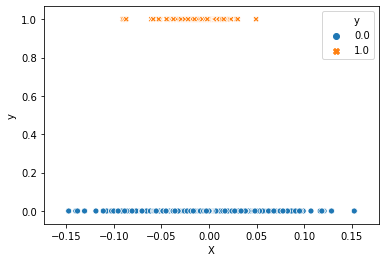

In [35]:
sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y")

In [36]:
import matplotlib.pyplot as plt

In [37]:
id_to_morpho_tag.items()

dict_items([(0, 'Number=Sing'), (1, 'Case=Nom'), (2, 'Voice=Act'), (3, 'VerbForm=Fin'), (4, '*BLANK*'), (5, 'Mood=Ind'), (6, 'Number=Plur'), (7, 'Case=Gen'), (8, 'Degree=Pos'), (9, 'Person=3'), (10, 'Tense=Pres'), (11, 'Case=Par'), (12, 'Tense=Past'), (13, 'Style=Coll'), (14, 'VerbForm=Part'), (15, 'Case=Ine'), (16, 'Case=Ill'), (17, 'PartForm=Past'), (18, 'Case=Ela'), (19, 'VerbForm=Inf'), (20, 'Voice=Pass'), (21, 'Person=1'), (22, 'Case=Ade'), (23, 'Person=0'), (24, 'Connegative=Yes'), (25, 'Polarity=Neg'), (26, 'InfForm=1'), (27, 'Person[psor]=3'), (28, 'PronType=Dem'), (29, 'Person=2'), (30, 'Case=All'), (31, 'AdpType=Post'), (32, 'PartForm=Pres'), (33, 'Derivation=Minen'), (34, 'NumType=Card'), (35, 'Case=Ess'), (36, 'Case=Tra'), (37, 'Typo=Yes'), (38, 'Mood=Cnd'), (39, 'PronType=Ind'), (40, 'Mood=Imp'), (41, 'Abbr=Yes'), (42, 'PronType=Prs'), (43, 'InfForm=3'), (44, 'Foreign=Yes'), (45, 'Clitic=Kin'), (46, 'Case=Ins'), (47, 'PartForm=Agt'), (48, 'Case=Abl'), (49, 'Person[psor]=1'

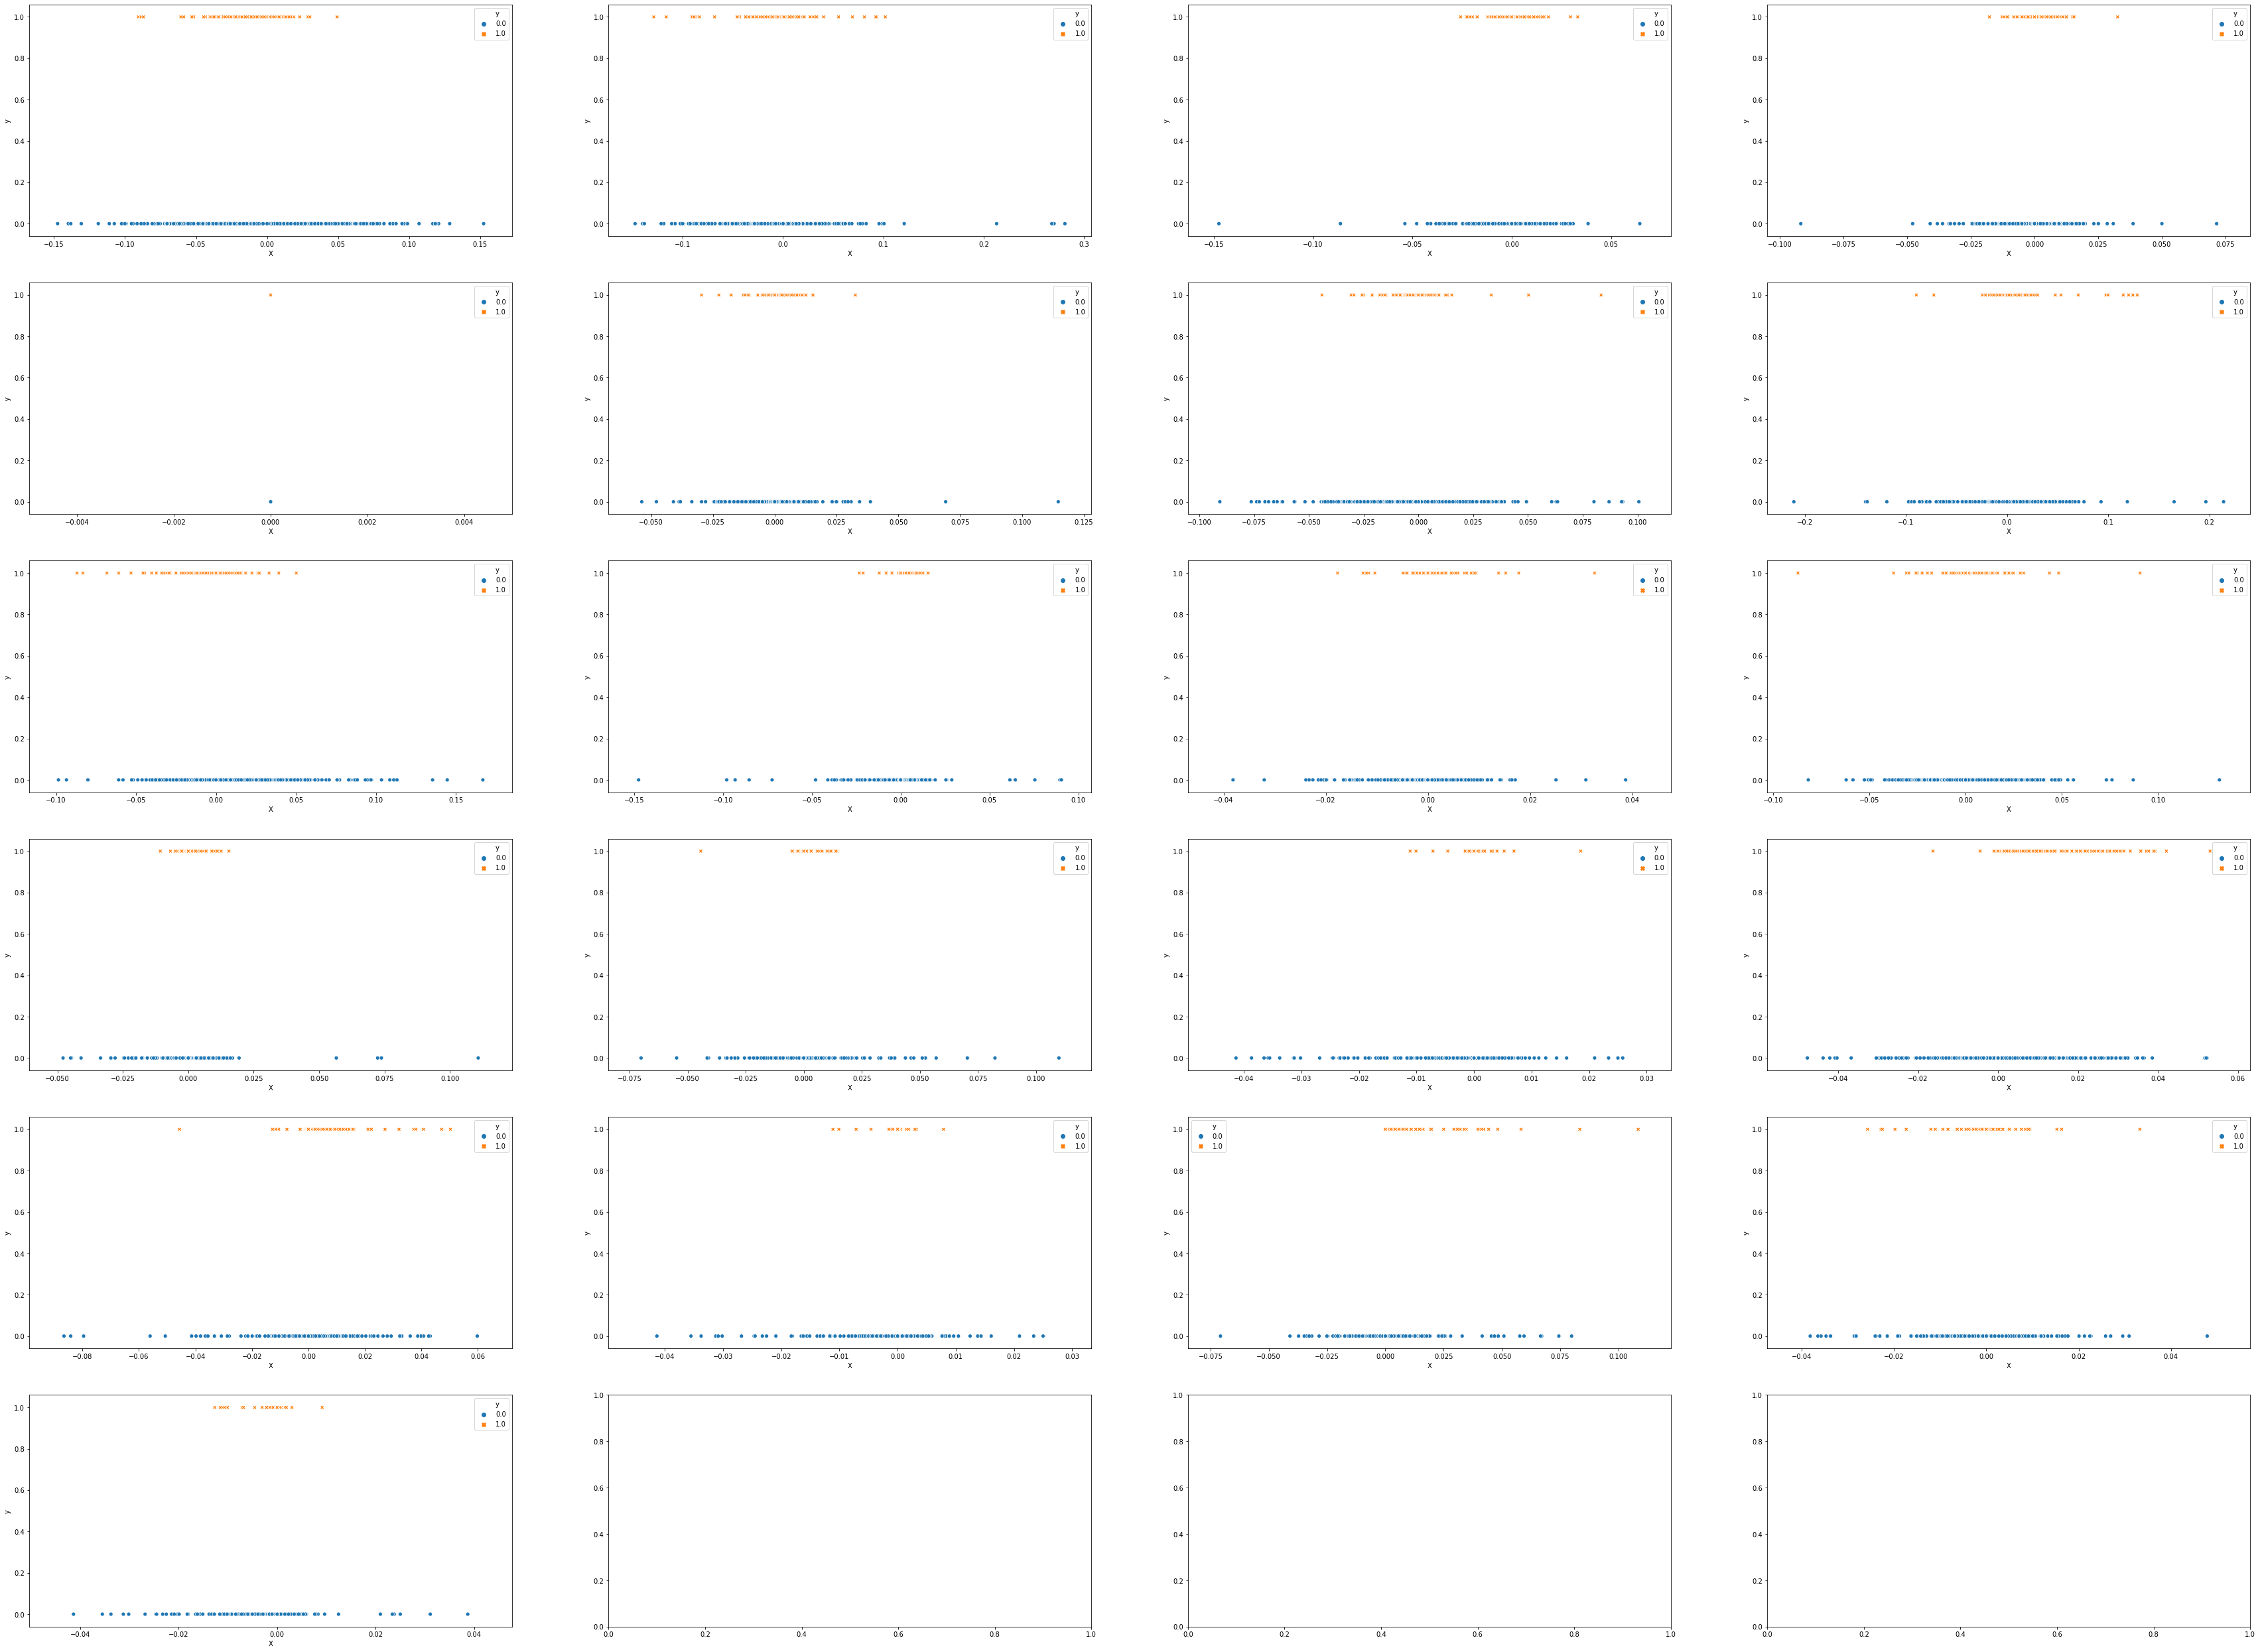

In [142]:
fig = plt.figure(figsize=(60, 45))
axes = fig.subplots(20//4+1, 4)
for idx, (morpho_tag_id, morpho_tag) in enumerate(id_to_morpho_tag.items()):
    if idx > 20:
        break
    entity_tag = "LOC"
    
    single_case_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
    single_case_y = np.array([int(x == entity_tag) for x in region_entity_types]).reshape([-1, 1])
    
    single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])
    
    sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y", ax=axes[idx//4, idx%4])

In [40]:
def plot_single_case(entity_type, morpho_tag_id):
    single_case_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
    single_case_y = np.array([int(x == entity_type) for x in region_entity_types]).reshape([-1, 1])
    
    single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])
    
    sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y")

In [141]:
fig.savefig("Finnish-LOC-plot-binary-classification-problems.pdf")

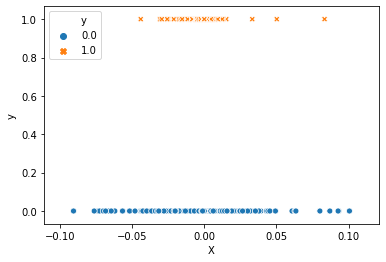

In [41]:
plot_single_case('LOC', 6)

In [42]:
finnish_binary_classification_df = pd.read_csv("../../binary-classification-problems-for-ner-train-finnish_model_100_size.txt",
                                               sep="\t",
                                               header=None,
                                               names=["label"] + [id_to_morpho_tag[idx] for idx in range(len(id_to_morpho_tag))])

In [43]:
finnish_binary_classification_df

,label,Number=Sing,Case=Nom,Voice=Act,VerbForm=Fin,*BLANK*,Mood=Ind,Number=Plur,Case=Gen,Degree=Pos,...,Case=Com,Derivation=Ttain,"Clitic=Han,Ko",Style=Arch,PartForm=Neg,Derivation=U,"Clitic=Han,Pa",Derivation=Llinen,Derivation=Tar,*UNKNOWN*
0,ORG,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ORG,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ORG,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TIT,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TIT,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,PER,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TIM,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ORG,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ORG,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ORG,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
import sklearn.metrics
common_morpho_tags = [dict(), dict(), dict()]
for entity_type in norm_explanations_nparray_dict.keys():
    mu_scores = []
    for idx, morpho_tag in id_to_morpho_tag.items():
        mu_scores.append((entity_type, morpho_tag, 
                          sklearn.metrics.mutual_info_score(finnish_binary_classification_df['label'] == entity_type, 
                                                            finnish_binary_classification_df[morpho_tag])))
    for entity_type, morpho_tag, mu_score in sorted(mu_scores, key=lambda x: x[2], reverse=True)[:10]:
        print(entity_type, morpho_tag, mu_score)
    mean_explanations_finnish = sorted([(entity_type, id_to_morpho_tag[idx], abs(mean_explanation_for_morpho_tag)) for idx, mean_explanation_for_morpho_tag in enumerate(list(np.mean(norm_explanations_nparray_dict[entity_type], axis=0)))],
       key=lambda x: x[2],
       reverse=True)
    mean_explanations_finnish_top = mean_explanations_finnish[:10]
    mean_explanations_finnish_bottom = mean_explanations_finnish[-10:]
    center_interval = [-0.05*np.std([x[2] for x in mean_explanations_finnish]), 
                       +0.05*np.std([x[2] for x in mean_explanations_finnish])]
#     center_interval = [np.mean([x[2] for x in mean_explanations_finnish])-0.4*np.std([x[2] for x in mean_explanations_finnish]), 
#                        np.mean([x[2] for x in mean_explanations_finnish])+0.4*np.std([x[2] for x in mean_explanations_finnish])]
    mean_explanations_finnish_center = [x 
                        for x in mean_explanations_finnish 
                        if (x[2] >= center_interval[0] and x[2] <= center_interval[1])]
    print(mean_explanations_finnish_top, mean_explanations_finnish_bottom)
    common_morpho_tags[0][entity_type] = set([x[1] for x in sorted(mu_scores, key=lambda x: x[2], reverse=True)[:10]]).intersection(set([x[1] for x in mean_explanations_finnish_top]))
    common_morpho_tags[1][entity_type] = set([x[1] for x in sorted(mu_scores, key=lambda x: x[2], reverse=True)[:10]]).intersection(set([x[1] for x in mean_explanations_finnish_bottom]))
    
    common_morpho_tags[2][entity_type] = set([x[1] for x in sorted(mu_scores, key=lambda x: x[2], reverse=True)[-10:]]).intersection(set([x[1] for x in mean_explanations_finnish_center]))
    
    

ORG Number=Sing 0.032029970453257006
ORG Case=Ine 0.01951874568622631
ORG NumType=Card 0.01662399414232884
ORG Degree=Pos 0.01569175230190152
ORG Case=Ess 0.014621792540091424
ORG Case=Gen 0.01438347403671869
ORG *UNKNOWN* 0.01348404276586243
ORG Number=Plur 0.011335649327132831
ORG Case=Par 0.009235505041257697
ORG Case=Nom 0.006634167169151328
[('ORG', 'Number=Sing', 2.3849906245762234), ('ORG', '*UNKNOWN*', 1.9629713984982062), ('ORG', 'Case=Nom', 0.9288290389489934), ('ORG', 'Degree=Pos', 0.6516631597121221), ('ORG', 'Case=Gen', 0.5334171734637846), ('ORG', 'Voice=Act', 0.5269328129726549), ('ORG', 'Number=Plur', 0.47601836288154314), ('ORG', 'Foreign=Yes', 0.45309226329716157), ('ORG', 'VerbForm=Fin', 0.4295204448854739), ('ORG', 'Abbr=Yes', 0.41122871023760516)] [('ORG', 'Derivation=Minen', 0.027177286897723363), ('ORG', 'Person=2', 0.025076793620476955), ('ORG', 'Clitic=Kin', 0.024374216160215838), ('ORG', 'Typo=Yes', 0.024132531473689524), ('ORG', 'Voice=Pass', 0.02172572861859

MISC Number=Plur 0.0072472130270106044
MISC Person[psor]=3 0.002013223005548192
MISC *UNKNOWN* 0.001573044471967551
MISC Number=Sing 0.001399749423366757
MISC Case=Par 0.0010496032400935384
MISC Case=Ela 0.0008950696627376773
MISC Case=Ess 0.0007684628417701099
MISC Case=Gen 0.0005481460177733863
MISC Degree=Pos 0.000473663808409807
MISC PronType=Dem 0.00043649948640504116
[('MISC', 'Number=Plur', 1.361596984364087), ('MISC', 'Case=Nom', 1.036526010596669), ('MISC', 'Number=Sing', 0.75374779623867), ('MISC', '*UNKNOWN*', 0.5713421841728007), ('MISC', 'Case=Ine', 0.32647701112426136), ('MISC', 'Case=Ela', 0.2836940138800721), ('MISC', 'Person[psor]=3', 0.22416239975307284), ('MISC', 'Case=Par', 0.22129182229042746), ('MISC', 'Degree=Pos', 0.1946629879535301), ('MISC', 'Voice=Act', 0.13608772275944322)] [('MISC', 'PartForm=Agt', 0.011671628517557034), ('MISC', 'PartForm=Pres', 0.009421363892339666), ('MISC', 'Degree=Sup', 0.008383313146079959), ('MISC', 'Derivation=Vs', 0.006252432587193

In [107]:
for top_or_bottom_idx, top_or_bottom in enumerate(["mu_scores_top_vs_means_top", 
                                                   "mu_scores_top_vs_means_bottom", 
                                                   "mu_scores_bottom_vs_means_center"]):
    for entity_type in common_morpho_tags[top_or_bottom_idx].keys():
        print(top_or_bottom, entity_type, len(common_morpho_tags[top_or_bottom_idx][entity_type]))
        print(common_morpho_tags[top_or_bottom_idx][entity_type])

mu_scores_top_vs_means_top ORG 6
{'*UNKNOWN*', 'Degree=Pos', 'Case=Nom', 'Number=Sing', 'Number=Plur', 'Case=Gen'}
mu_scores_top_vs_means_top TIT 4
{'Number=Sing', 'Case=Nom', 'Case=Gen', 'Case=Par'}
mu_scores_top_vs_means_top PER 5
{'Degree=Pos', 'Abbr=Yes', 'Case=Nom', 'Number=Sing', 'Number=Plur'}
mu_scores_top_vs_means_top TIM 6
{'Case=Par', '*UNKNOWN*', 'Degree=Pos', 'PronType=Dem', 'Case=Ess', 'Number=Sing'}
mu_scores_top_vs_means_top LOC 6
{'*UNKNOWN*', 'Degree=Pos', 'Case=Nom', 'Case=Ine', 'Number=Plur', 'Case=Ill'}
mu_scores_top_vs_means_top DATE 4
{'*UNKNOWN*', 'Case=Ess', 'Degree=Pos', 'Case=Ine'}
mu_scores_top_vs_means_top PRO 4
{'Case=Ela', 'Case=Nom', 'NumType=Card', 'Case=Par'}
mu_scores_top_vs_means_top MISC 7
{'Case=Ela', 'Person[psor]=3', 'Case=Par', '*UNKNOWN*', 'Degree=Pos', 'Number=Sing', 'Number=Plur'}
mu_scores_top_vs_means_top EVENT 3
{'Voice=Act', 'Number=Plur', 'Case=Ine'}
mu_scores_top_vs_means_top OUTSIDE 4
{'Case=Ade', 'Degree=Pos', 'Case=Nom', 'Number=Sing

##### from sklearn.linear_model import LogisticRegression

cl12_clf = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}
cl12_scores = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}

morpho_tags_that_are_more_successful = []

for entity_tag in explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():
        
        cl12_clf[entity_tag][morpho_tag_id] = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='auto', max_iter=1000, verbose=0)
        single_feature_X = np.array(finnish_binary_classification_df[morpho_tag]).reshape([-1,1])
        binarized_y = np.array([int(x) for x in finnish_binary_classification_df['label'].apply(lambda x: x == entity_tag)])
        # print(binarized_y)
        y = binarized_y
        cl12_clf[entity_tag][morpho_tag_id].fit(single_feature_X, y)
        cl12_scores[entity_tag][morpho_tag_id] = cl12_clf[entity_tag][morpho_tag_id].score(single_feature_X, y)
        # print(scores)
        prior_prob_of_entity_tag_class = sum(binarized_y)/float(len(binarized_y))
        #print(entity_tag, morpho_tag_id, morpho_tag, scores[entity_tag][morpho_tag_id], 
        #      prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class,
        #     max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class))
        if scores[entity_tag][morpho_tag_id] > max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class):
            morpho_tags_that_are_more_successful.append((entity_tag, morpho_tag_id, morpho_tag))

morpho_tags_that_are_more_successful

In [194]:
all_columns_clf = dict()

for entity_tag in explanations_nparray_dict.keys():
    all_columns_clf[entity_tag] = LogisticRegression(random_state=0, solver='lbfgs',
                                      multi_class='auto', max_iter=1000, verbose=0)

    single_feature_X = np.array(finnish_binary_classification_df.iloc[:, 1:]).reshape([len(finnish_binary_classification_df),-1])
    binarized_y = np.array([int(x) for x in finnish_binary_classification_df['label'].apply(lambda x: x == entity_tag)])
    # print(binarized_y)
    y = binarized_y
    all_columns_clf[entity_tag].fit(single_feature_X, y)
    prior_prob_of_entity_tag_class = sum(binarized_y)/float(len(binarized_y))
    print("YES" if max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class) < all_columns_clf[entity_tag].score(single_feature_X, y) else "NO",
        entity_tag, all_columns_clf[entity_tag].score(single_feature_X, y), 
            prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class,
             max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class))
    

YES ORG 0.7163578074908125 0.35581358980373756 0.6441864101962624 0.6441864101962624
NO TIT 0.9753303620298694 0.02466963797013058 0.9753303620298694 0.9753303620298694
YES PER 0.9129329892876691 0.0871452029087497 0.9128547970912503 0.9128547970912503
YES TIM 0.9303307529908516 0.20126671358198453 0.7987332864180154 0.7987332864180154
YES LOC 0.9225506294471811 0.07975604034717335 0.9202439596528267 0.9202439596528267
YES DATE 0.9729845961373055 0.037375869888185156 0.9626241301118148 0.9626241301118148
YES PRO 0.8351317538509657 0.174642270701384 0.8253577292986161 0.8253577292986161
NO MISC 0.9643443584330283 0.03549925717413402 0.964500742825866 0.964500742825866
YES EVENT 0.9966377355539917 0.003635937133474079 0.9963640628665259 0.9963640628665259
NO OUTSIDE 0.999804519508953 0.0001954804910469935 0.999804519508953 0.999804519508953
